<a href="https://colab.research.google.com/github/Jessicaxiong61/DS-3001/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this lab, I picked musical instruments that are on sale in Charlottesville on Craigslist.

Below is a screenshot from Craigslist:  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://charlottesville.craigslist.org/search/msa?purveyor=owner#search=1~grid~0~0' # The page we want to scrape
raw = requests.get(url,headers=header) # Get page

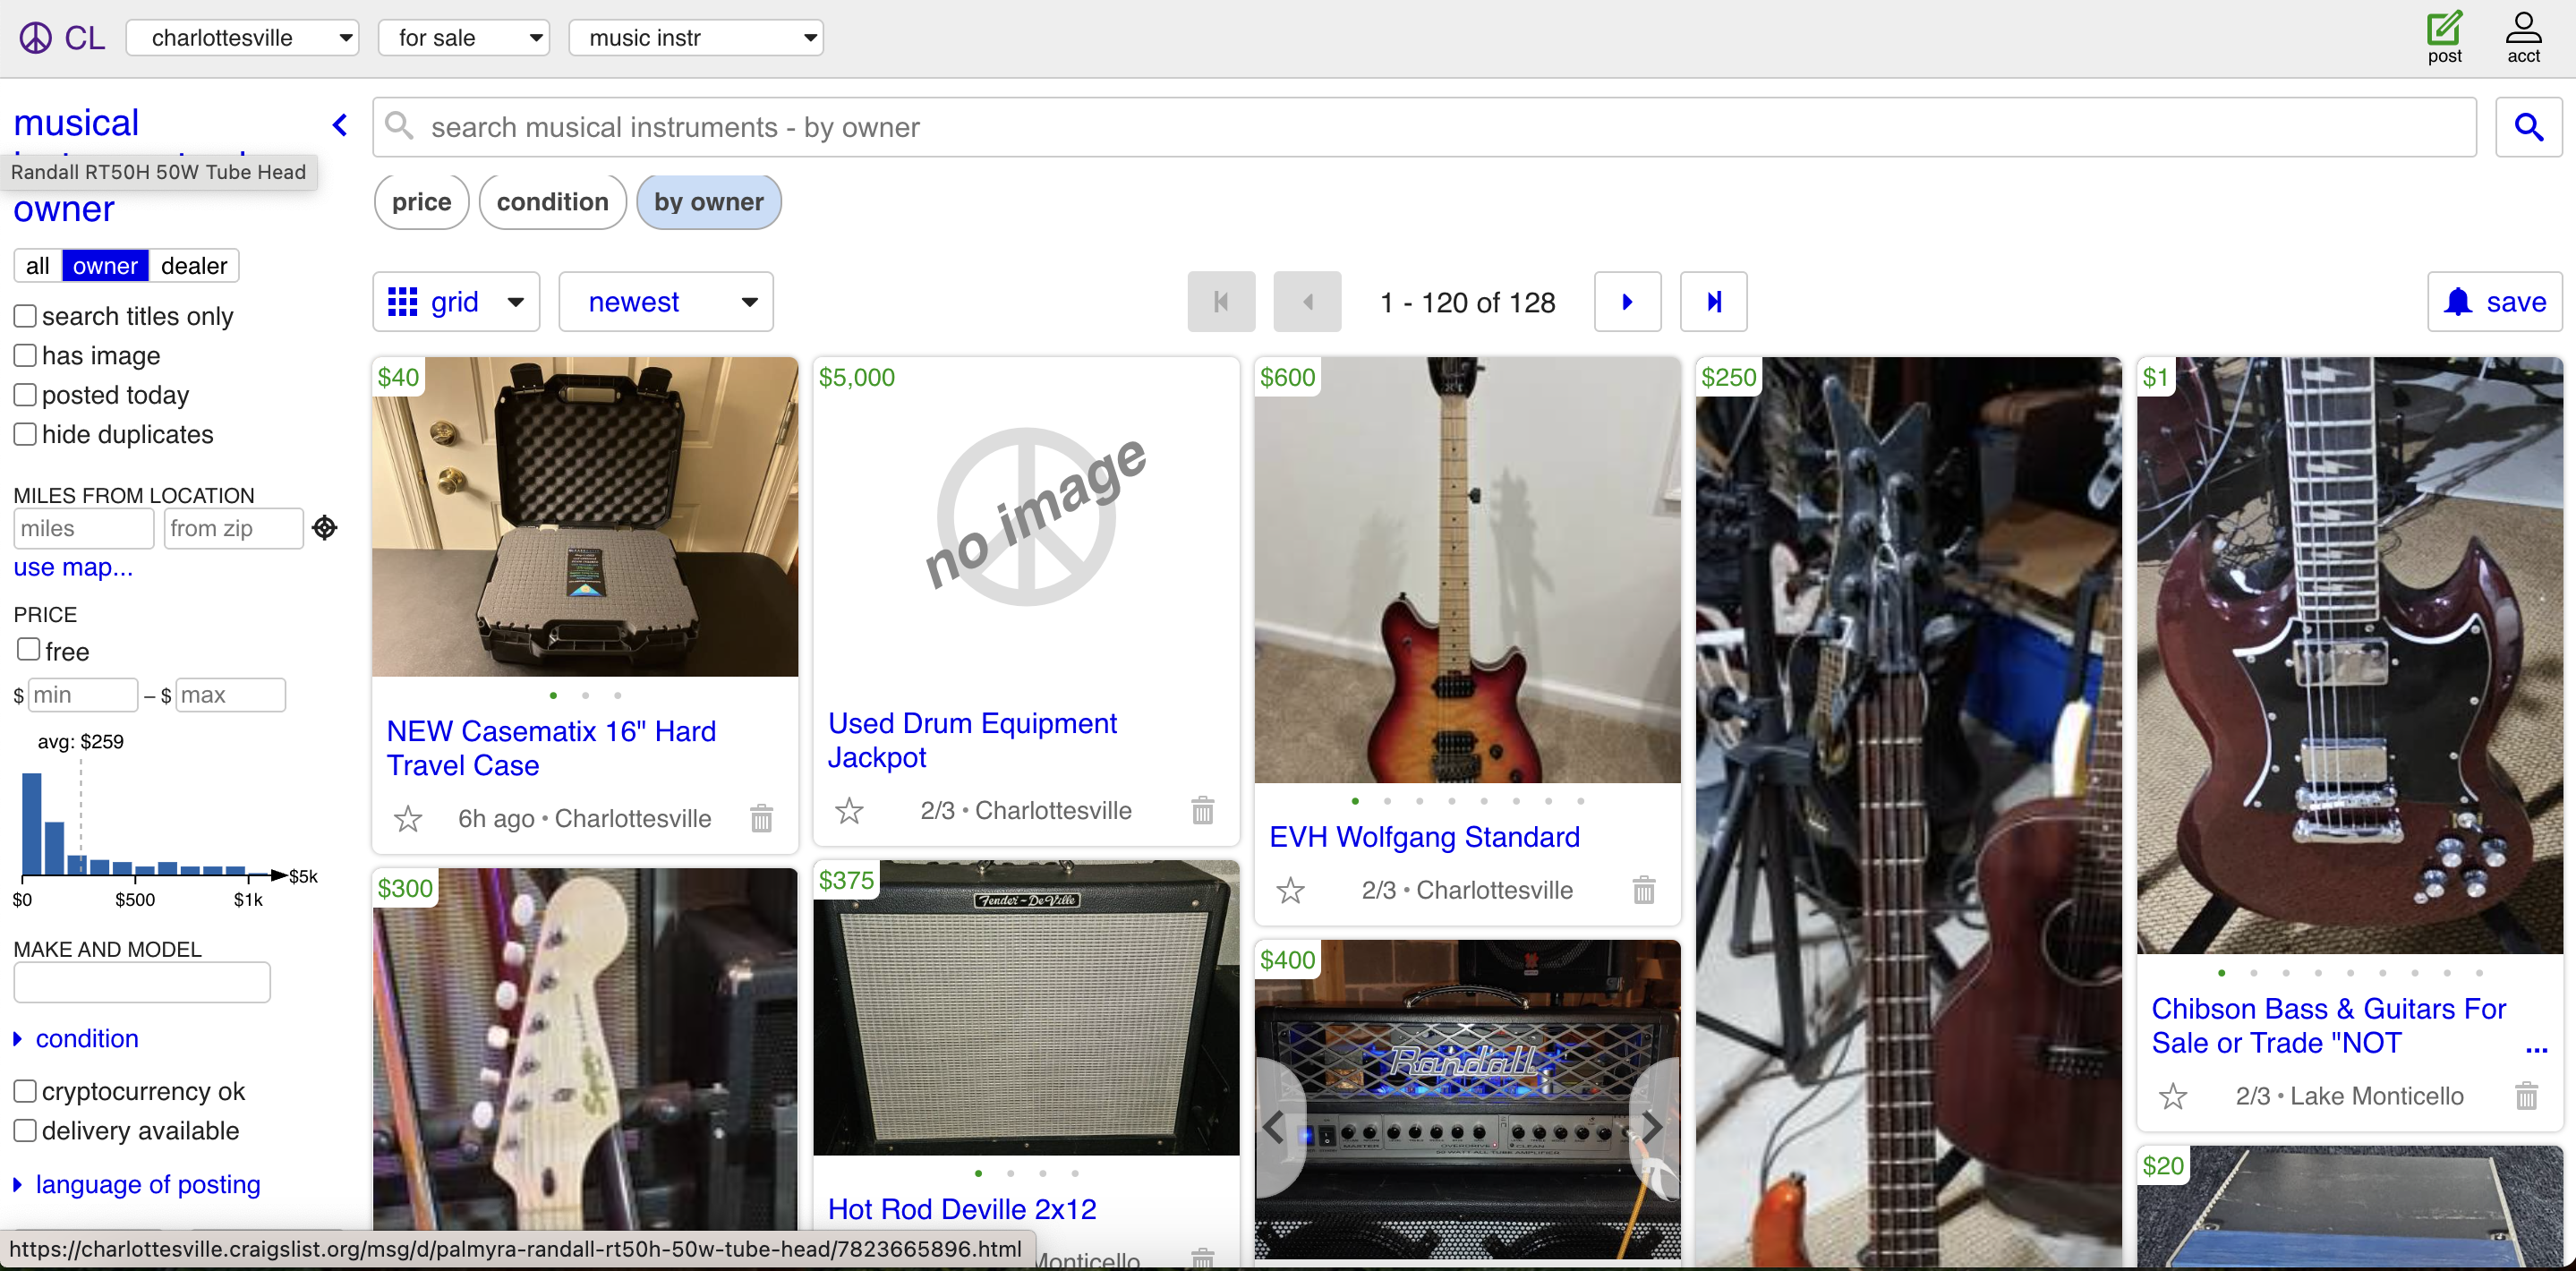

In [1]:
from IPython.display import display
from PIL import Image

img_path = "/content/Screenshot 2025-02-03 at 23.40.13.png"
img1 = Image.open(img_path)
display(img1)


By opening the HTML source code of the webpage using Command + Option + U, I got the following two pictures. And I also realized that class = "cl-static-search-result" term appear attached to each listing of the musical instrument.

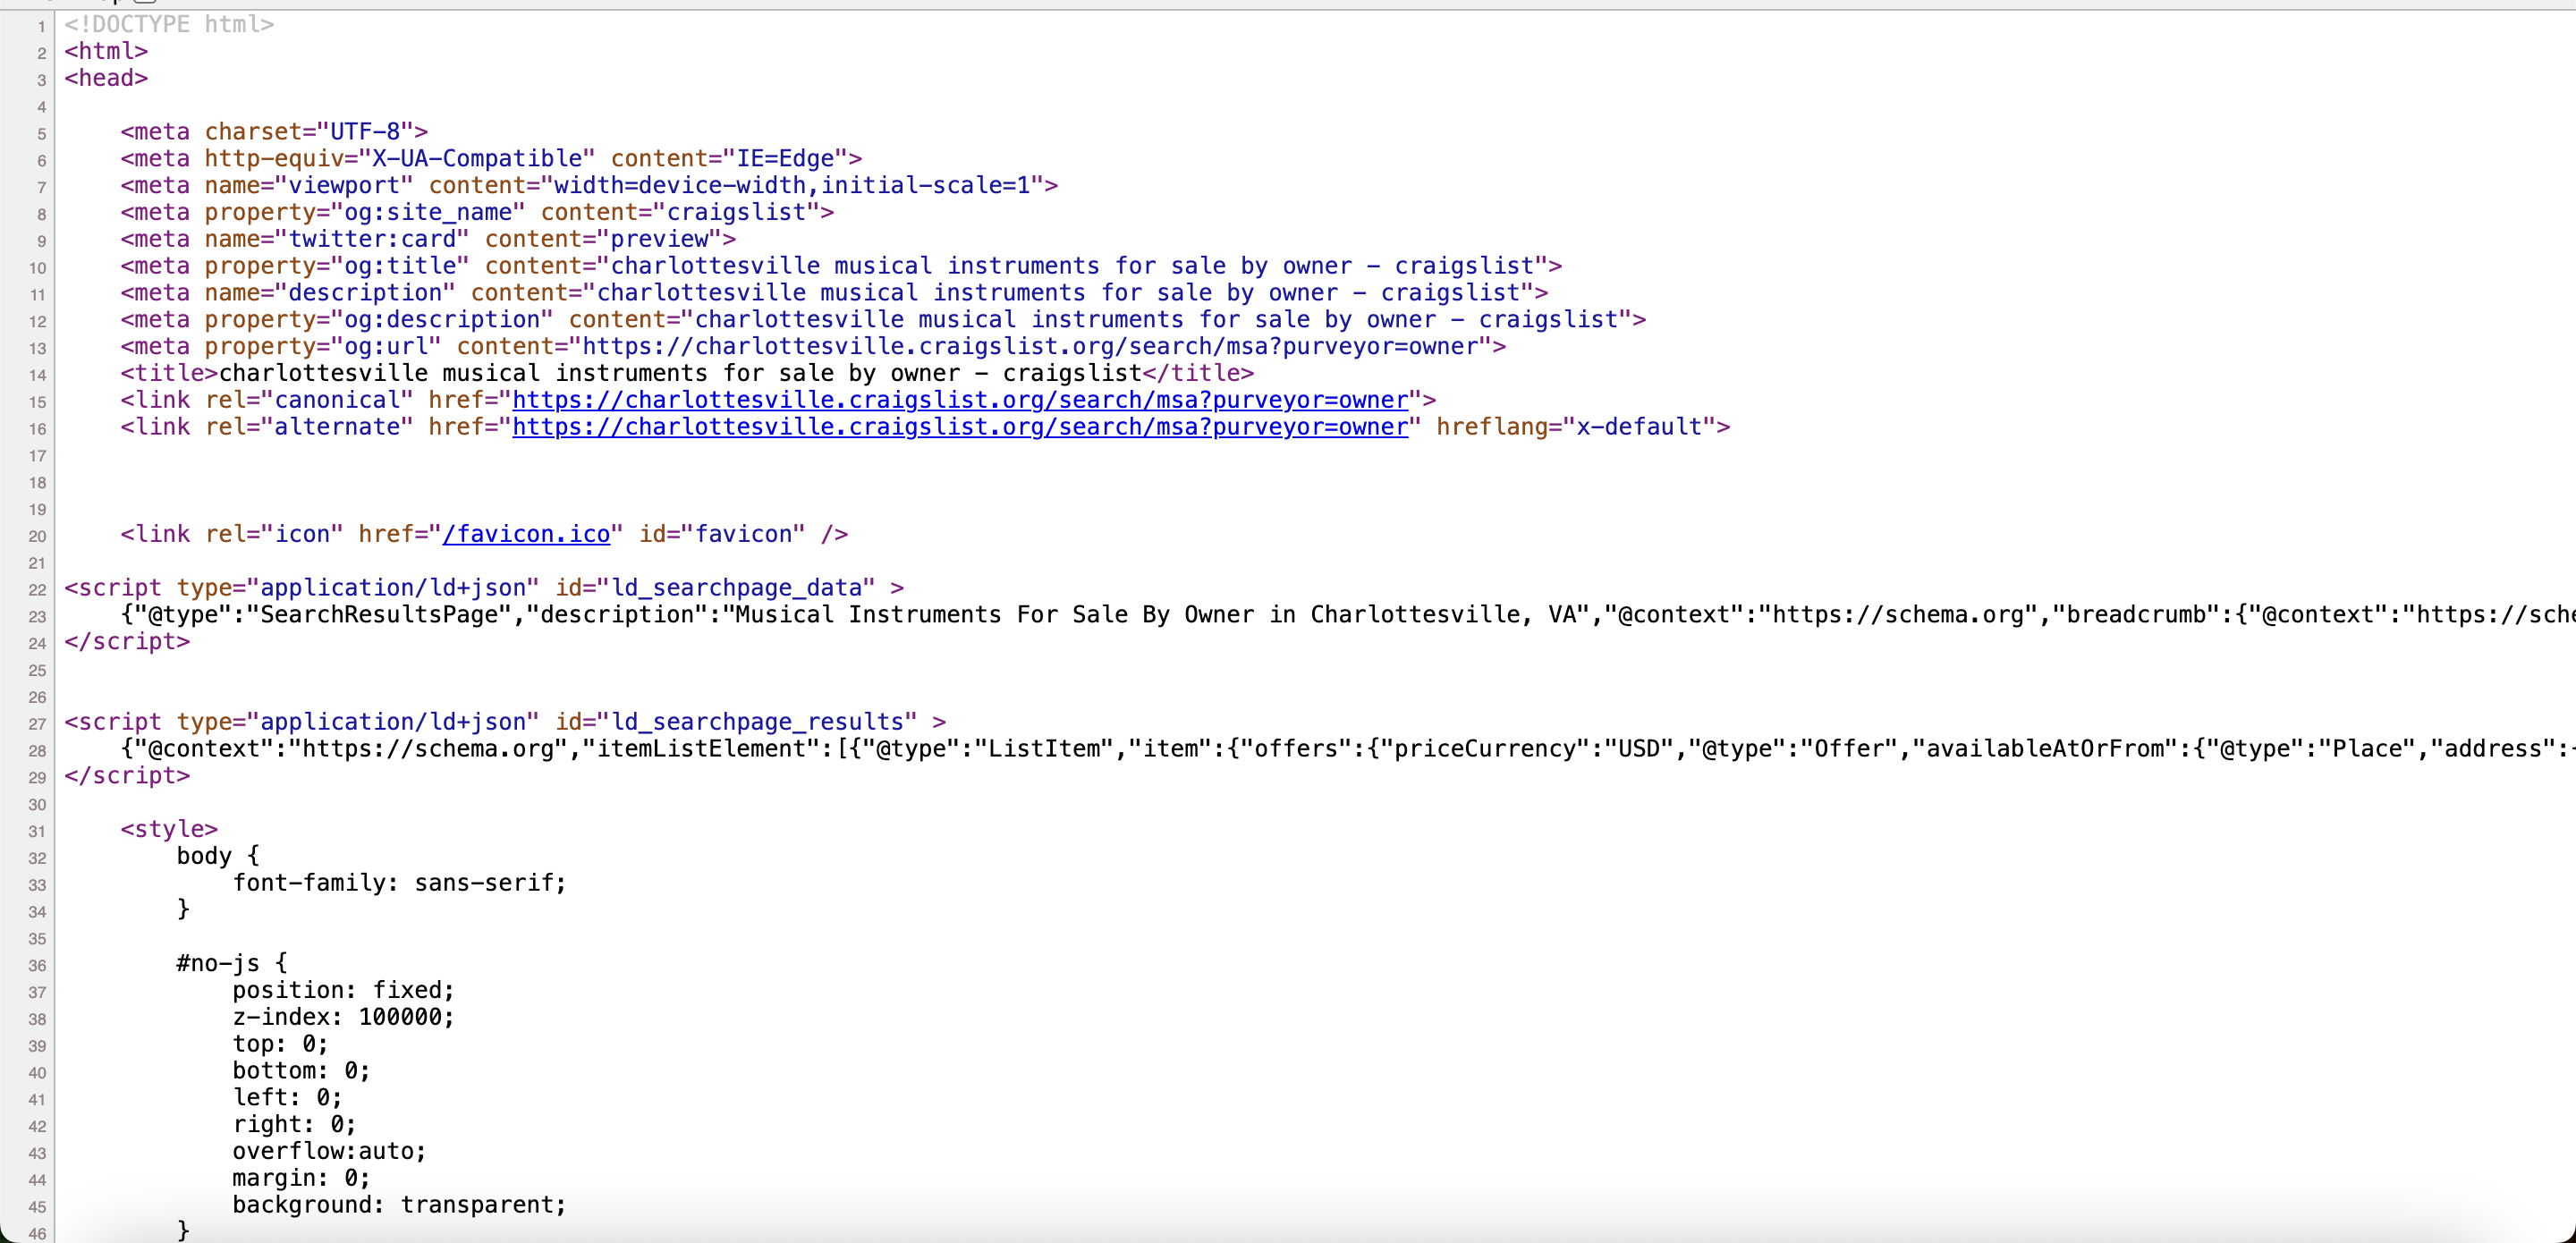

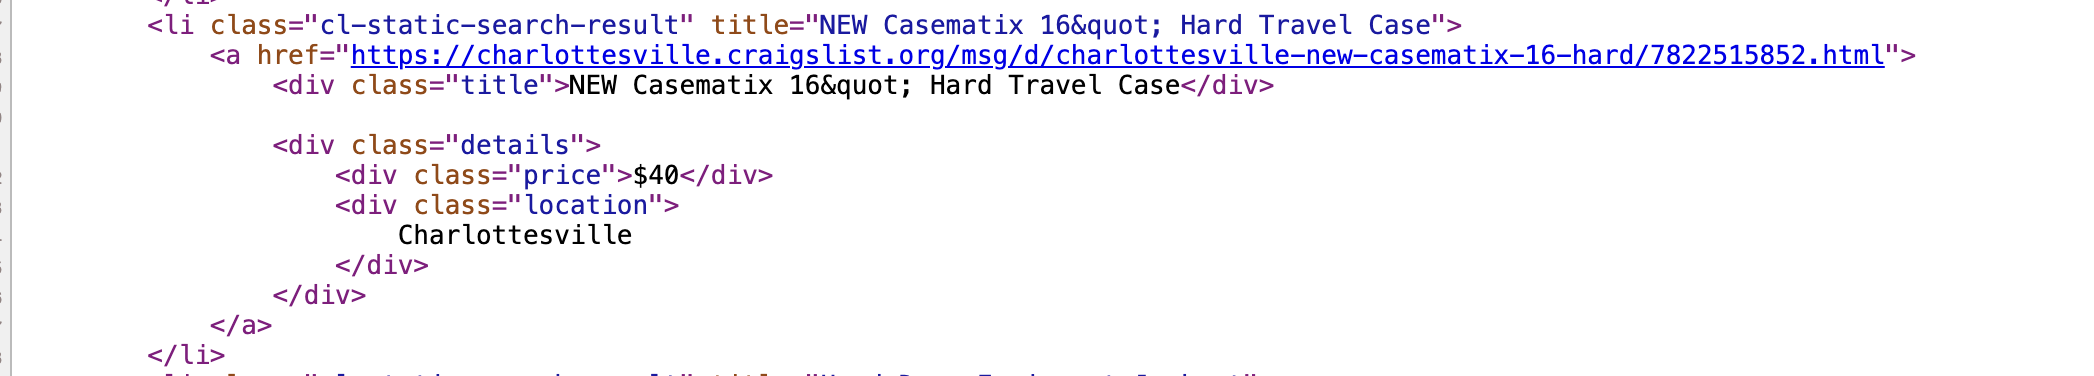

In [2]:
img_path = "/content/Screenshot 2025-02-03 at 23.44.50.png"
img2 = Image.open(img_path)
display(img2)

img_path = "/content/Screenshot 2025-02-03 at 23.46.15.png"
img3 = Image.open(img_path)
display(img3)

In [5]:
from bs4 import BeautifulSoup as soup  # Import BeautifulSoup for parsing HTML

bsObj = soup(raw.content, 'html.parser')  # Parse the raw HTML content

listings = bsObj.find_all(class_="cl-static-search-result")  # Find all elements with class "cl-static-search-result"


In [20]:
import re  # Regular expressions
import numpy as np  # For handling missing values

# List of instrument types to look for in the title
instruments = ['bass', 'guitar', 'djembe', 'piano', 'trumpet', 'banjo',
               'microphone', 'pedal', 'ukulele', 'cymbal', 'amp', 'drum',
               'clarinet', 'recorder','harmonix']

data = []  # List to store extracted listings

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get instrument type from the title:
    words = title.split()
    hits = [word for word in words if word in instruments] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'instrument':instrument})



In [21]:
import pandas as pd

## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']


# Save the cleaned dataset
df.to_csv('instrument_listings.csv', index=False)
df

title  price  year  \
0                   new casematix 16" hard travel case     40   NaN   
1                          used drum equipment jackpot   5000   NaN   
2                                evh wolfgang standard    600   NaN   
3                           dean edge q5 5 string bass    250   NaN   
4    chibson bass & guitars for sale or trade "not ...      1   NaN   
..                                                 ...    ...   ...   
121            left hand deering sierra mahogany banjo   1800   NaN   
122                                roto toms 6"/8"/10"    150   NaN   
123                   fender blues jr. tweed amplifier    500   NaN   
124                                  ampeg svt iii pro    400   NaN   
125  electro harmonix 45000 multitrack recorder and...    250   NaN   

                                                  link instrument  age  
0    https://charlottesville.craigslist.org/msg/d/c...   harmonix  NaN  
1    https://charlottesville.craigslist.org/msg/d/c...   harmonix  NaN  
2    https://charlottesville.craigslist.org/msg/d/c...   harmonix  NaN  
3    https://charlottesville.craigslist.org/msg/d/p...   harmonix  NaN  
4    https://charlottesville.craigslist.org/msg/d/p...   harmonix  NaN  
..                                                 ...        ...  ...  
121  https://charlottesville.craigslist.org/msg/d/b...   harmonix  NaN  
122  https://charlottesville.craigslist.org/msg/d/c...   harmonix  NaN  
123  https://charlottesville.craigslist.org/msg/d/c...   harmonix  NaN  
124  https://charlottesville.craigslist.org/msg/d/s...   harmonix  NaN  
125  https://charlottesville.craigslist.org/msg/d/c...   harmonix  NaN  

[126 rows x 6 columns]